<a href="https://colab.research.google.com/github/mudassaralye/EDA/blob/main/Birth_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Reading Dataset file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/births.csv')

Add a new column “Decade”

In [2]:
df['Decade']=(df['year']//10)*10
df

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


Show the descriptive statistics of the data.

In [3]:
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


Check if your data contains any missing values

In [4]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

What is the trend of male & female births every decade?

In [5]:
trend_by_decade=df.groupby(['Decade','gender'])['births'].sum().unstack()
trend_by_decade

gender,F,M
Decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Removing outliers from dataset

In [6]:
mean_births=df['births'].mean()
std_births=df['births'].std()
df=df[(df['births']>=mean_births-5*std_births)&(df['births']<=mean_births+5*std_births)]

Plot births by weekday for several decades.

In [7]:
df=df.dropna(subset=['year','month','day'])

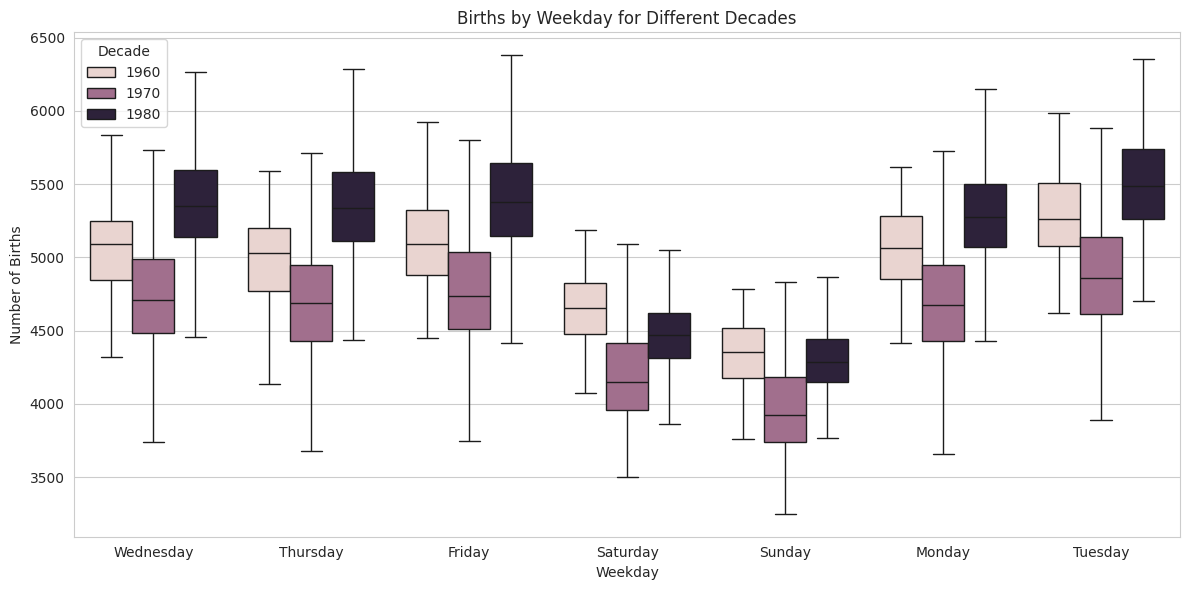

In [8]:
df[['year','month','day']]=df[['year','month','day']].astype(int)
df=df[df['day']<=31]
df['date']=pd.to_datetime(df[['year','month','day']],errors='coerce')
df['weekday']=df['date'].dt.day_name()
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday',y='births',data=df,hue='Decade',showfliers=False)
plt.title('Births by Weekday for Different Decades')
plt.xlabel('Weekday')
plt.ylabel('Number of Births')
plt.legend(title='Decade')
plt.tight_layout()
plt.show()

Group the data by month and day separately

In [9]:
births_by_month=df.groupby('month')['births'].sum()
births_by_day=df.groupby(['month','day'])['births'].sum()

Focusing on the month and day only, you have a time series reflecting the average number of births by date of the year. From this, plot the data.

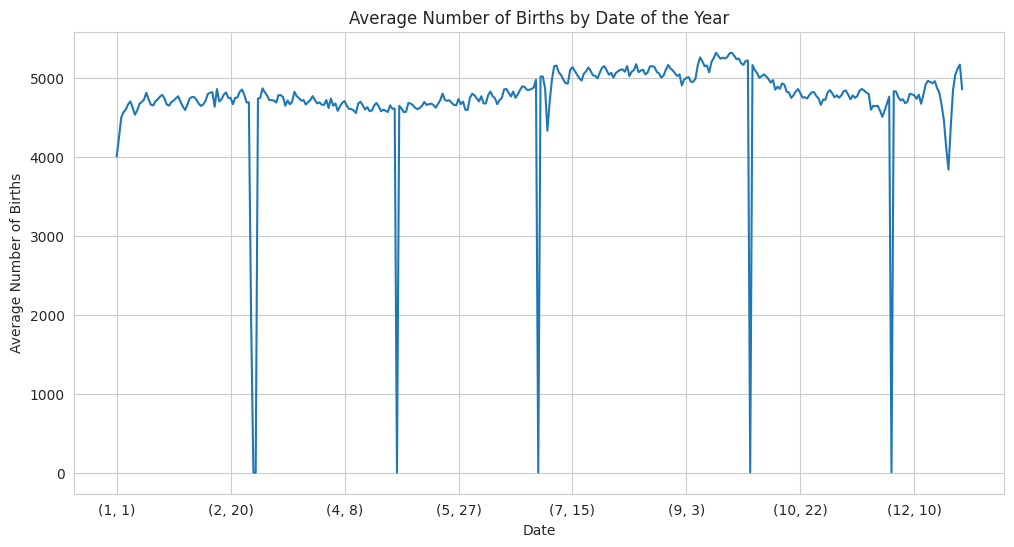

In [10]:
average_births_by_date=df.groupby(['month','day'])['births'].mean()
plt.figure(figsize=(12,6))
average_births_by_date.plot()
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Date')
plt.ylabel('Average Number of Births')
plt.show()